## Potential counterexamples to the Andrews-Curtis conjecture

In [1]:
# load package from Finite_Spaces
!sage --preparse Finite_Spaces/Homotopy.sage
!mv Finite_Spaces/Homotopy.sage.py Finite_Spaces/Homotopy.py
!sage --preparse Finite_Spaces/Deformations.sage
!mv Finite_Spaces/Deformations.sage.py Finite_Spaces/Deformations.py
!sage --preparse Finite_Spaces/Presentations.sage
!mv Finite_Spaces/Presentations.sage.py Finite_Spaces/Presentations.py
!sage --preparse Finite_Spaces/Morse.sage
!mv Finite_Spaces/Morse.sage.py Finite_Spaces/Morse.py
!sage --preparse Finite_Spaces/Colorings.sage
!mv Finite_Spaces/Colorings.sage.py Finite_Spaces/Colorings.py

from Finite_Spaces.Presentations import *
from Finite_Spaces.Morse         import *

We next prove that the following potential counterexamples of the Andrews-Curtis conjecture do satisfy the conjecture.

### 1. Akbulut & Kirby

Consider the balanced presentation of the trivial group introduced by Akbulut and Kirby (1985).

$
\mathcal{A K}_2=\langle x, y | xyx = yxy, ~x^2 = y^{3}\rangle
$ 

In [2]:
# list of generators
gens = ['x', 'y']

# list of relators: each relator is a list of tuples of (generator, exponent)
rels = [[('x',2), ('y',-3)], [('x',1), ('y',1), ('x',1), ('y',-1), ('x', -1), ('y', -1)]]

# group presentation
G = group_presentation(gens, rels)
print(G)

Finitely presented group < x, y | x^2*y^-3, x*y*x*y^-1*x^-1*y^-1 >


We verify that the greedy reduction method, implemented in Sage as the method _.simplified()_, does not perform any reduction in the presentation.

In [3]:
# greedy simplification of AK2
G.simplified()

Finitely presented group < x, y | x^2*y^-3, x*y*x*y^-1*x^-1*y^-1 >

We compute the poset associated to the presentation, that is, the face poset of the barycentric subdivision of the 
standard complex associated to the original presentation.

In [4]:
# compute the presentation poset
X = presentation_poset(gens, rels)

In [5]:
len(X)

53

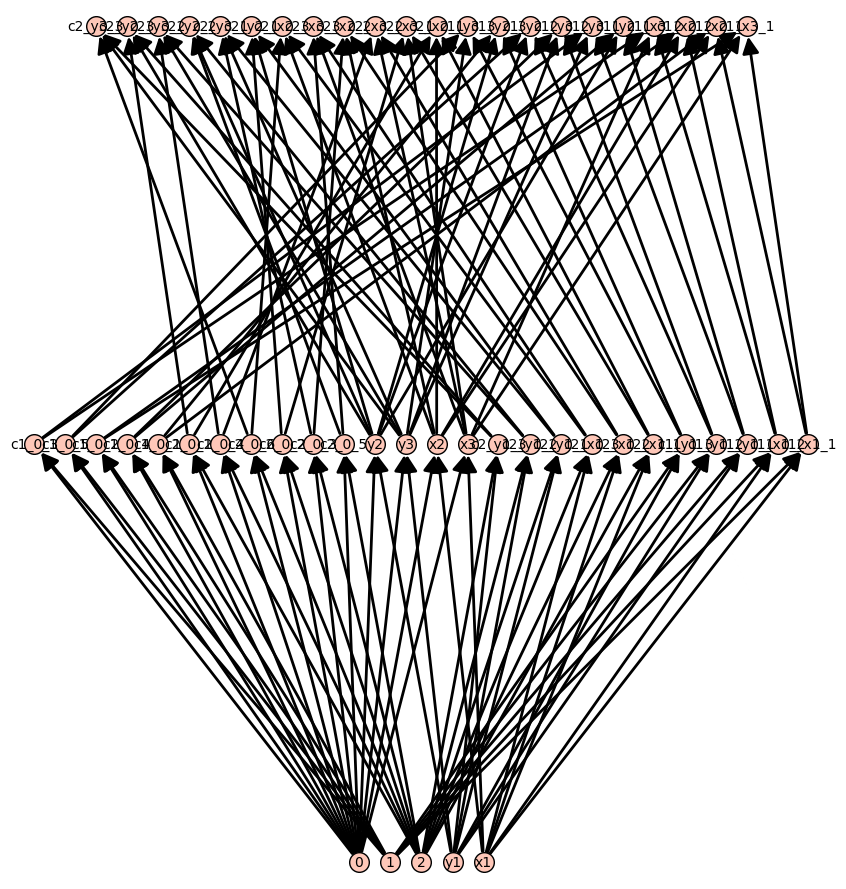

In [6]:
X.show(figsize = (9,9))

We now randomly generate acyclic matchings with a single critical 0-cell on the presentation poset associated to the presentation. It is easy to find a matching for which the associated Morse presentation in greedily trivializable.

In [7]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())

print('Matching:\n', M)
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Matching:
 [['x3', 'c1_x3_1'], ['y1', 'c1_y1_3'], ['x2', 'c2_x2_3'], ['x1', 'c2_x1_3'], ['c1_0_2', 'c1_x2_2'], ['y2', 'c1_y2_2'], ['c2_0_2', 'c2_y2_1'], ['y3', 'c1_y3_1'], [1, 'c1_0_3'], [0, 'c2_0_4'], ['c2_0_6', 'c2_y3_3'], ['c2_0_1', 'c2_x2_1'], ['c2_0_3', 'c2_x2_2'], ['c2_y1_1', 'c2_y3_1'], ['c1_y1_1', 'c1_y2_1'], ['c2_y1_2', 'c2_y3_2'], ['c2_0_5', 'c2_y2_2'], ['c2_x1_1', 'c2_x3_1'], ['c1_0_1', 'c1_y2_3']]
Morse Presentation:
 Finitely presented group < a0, a1, a2, a3, a4, a5, a6 | a6*a5^-1*a1*a5, a1^-1*a5*a6*a5^-1*a1*a0^-1*a2^-1*a4*a0*a1^-1*a5*a6^-1*a5^-1*a1*a0^-1*a3^-1*a0, a6*a5^-1*a6, a2^-1*a4*a0*a1^-1*a5*a6^-1*a3, a2^-1*a4*a0*a1^-1*a5*a6^-1*a4, a6*a5^-1*a1*a0^-1*a2^-1*a1^-1*a5, a6*a5^-1*a1*a0^-1*a4^-1*a2*a6 >
Reduction of the Morse presentation:
 Finitely presented group <  |  >
CPU times: user 31 ms, sys: 0 ns, total: 31 ms
Wall time: 33.7 ms


We verify that the matching $M$ is effectively acyclic.

In [8]:
is_acyclic(X,M)

True

We also test if the induced spanning tree at the 1-skeleton of the associated regular complex produces a Morse presentation that is greedily trivializable.

In [9]:
T = induced_spanning_tree(X,M)
print(T)

[['y1', 'c1_y1_3'], ['x1', 'c2_x1_3'], [1, 'c1_0_3'], [0, 'c2_0_4']]


The greedily simplified presentation associated to the Morse presentation computed from the spanning tree is not $<~|~>$

In [10]:
TT = Morse_presentation(gens, rels, T)
print(TT)
print(TT.simplified())

Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21 | a9^-1*a3^-1, a9^-1*a11, a9^-1*a2^-1, a9^-1*a0^-1*a12, a13^-1*a10^-1*a0, a13^-1*a11^-1*a4, a15*a8^-1*a14, a15^-1*a12^-1, a15*a6^-1*a10, a9^-1*a4^-1*a16, a13^-1*a16^-1*a3, a13*a1^-1*a17, a9*a18^-1*a1, a15*a7^-1*a18, a19*a14^-1*a5, a19*a17^-1*a6, a19*a7, a19*a8, a15*a5^-1*a20, a13^-1*a20^-1, a19^-1*a21, a13^-1*a21^-1*a2 >
Finitely presented group < a7, a12 | a12^-1*a7^-1*a12*a7^-1*a12^-1, a7^-1*a12^-1*a7^-4*a12^-1 >


### 2. Miller III & Schupp

Consider the balanced presentation of the trivial group introduced by Miller III and Schupp (1999).

$
\mathcal{M S}_3 = \langle x, y |x^{-1}y^3 x = y^4, x = y^{-1}xyx^{-1}\rangle
$

The presentation $\mathcal{MS}_3$ is not greedily trivilizable.

In [11]:
gens = ['x', 'y']

n=3
rels = [[('x',-1), ('y',n), ('x',1), ('y', -(n+1))], [('y',-1), ('x',1), ('y',1), ('x', -2)]]

# group presentation
G = group_presentation(gens, rels)
print(G)
print(G.simplified())

Finitely presented group < x, y | x^-1*y^3*x*y^-4, y^-1*x*y*x^-2 >
Finitely presented group < x, y | y^-1*x*y*x^-2, y^2*x*y^-3*x^-2 >


We construct the presentation poset $\mathcal{X}(K'_{\mathcal{MS}_3})$.

In [12]:
X = presentation_poset(gens, rels)
len(X)

65

The generation of (random) acyclic matchings with a single critical 0-cell on the presentation poset soon generates one for which the associated Morse presentation in greedily trivializable.

In [13]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())

print('Matching:\n', M)
print('Is acyclic:\n', is_acyclic(X,M))
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Matching:
 [['c1_0_8', 'c1_y2_5'], ['y2', 'c2_y2_2'], ['y3', 'c1_y3_1'], ['x2', 'c1_x2_1'], ['c2_0_5', 'c2_x3_3'], ['c1_y1_7', 'c1_y2_7'], ['c1_y1_3', 'c1_y3_3'], [0, 'c2_0_3'], ['c1_0_4', 'c1_y3_2'], [1, 'c1_y1_6'], ['c1_0_6', 'c1_x3_2'], ['x3', 'c2_x3_2'], ['c1_0_9', 'c1_y3_7'], ['c1_y1_2', 'c1_y2_2'], ['x1', 'c2_x1_2'], ['c1_0_7', 'c1_y2_4'], [2, 'c2_y1_1'], ['c2_x1_1', 'c2_x2_1'], ['c2_0_1', 'c2_y3_1'], ['c1_0_5', 'c1_x2_2'], ['c1_y1_1', 'c1_y2_1'], ['c1_0_1', 'c1_x3_1'], ['c1_y1_4', 'c1_y3_4'], ['c2_0_2', 'c2_y2_1'], ['c2_0_4', 'c2_y3_2']]
Is acyclic:
 True
Morse Presentation:
 Finitely presented group < a0, a1, a2, a3, a4, a5, a6 | a2^-1*a6*a5^-1*a6*a1*a3, a6^-1*a5*a6^-1*a2*a4^-1*a5*a6^-1*a5, a5^-1*a6*a1*a0^-1*a4, a5^-1*a6*a1*a0*a1^-1, a6^-1*a5*a1^-1*a6^-1*a2, a1^-1*(a5^-1*a6)^2*a2^-1, a2^-1*a6*a5^-1*a6*a3^-1 >
Reduction of the Morse presentation:
 Finitely presented group <  |  >
CPU times: user 2.72 s, sys: 31 ms, total: 2.75 s
Wall time: 2.76 s


We verify that the Morse presentation computed from the spanning tree induced by the previous matching is not geedily trivializable.

In [14]:
T = induced_spanning_tree(X,M)

TT = Morse_presentation(gens, rels, T)
print(TT)
print(TT.simplified())

Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27 | a12*a11^-1*a4, a12^-1*a13, a12*a14^-1*a2, a12*a15^-1*a3, a16*a1^-1*a11, a17*a10^-1*a14, a17^-1*a13^-1*a9, a17^-1*a18^-1*a7, a16*a4^-1*a18, a19^-1*a15, a16*a2^-1*a20, a12*a20^-1*a1, a12^-1*a0^-1*a21, a16^-1*a21^-1*a5, a12^-1*a22, a16^-1*a22^-1*a0, a17*a8^-1*a23, a16^-1*a23^-1, a19*a8, a16*a3^-1, a12^-1*a5^-1*a24, a19*a24^-1*a10, a16^-1*a25^-1, a12^-1*a6^-1*a25, a16^-1*a26^-1*a6, a19^-1*a7^-1*a26, a19^-1*a9^-1*a27, a17^-1*a27^-1 >
Finitely presented group < a3, a12 | a3^-1*a12^-1*a3*a12*a3^-1, (a12^-1*a3^-1)^2*a3^-2*a12*a3^-1 >


### 3. Gordon

The following family of balanced presentations of the trivial group is a subfamily of presentations introduced by Gordon (1984).

$\mathcal{G}_q =\langle x, y | x=x^{-1}y^{-1}x y, y = y^{-1}x^q y x^{-q}\rangle$

In [15]:
gens = ['x', 'y']
def rels_Gordon(q):
    rels = [[('x', -1)] + commutator([('x', -1)], [('y', -1)]), [('y', -1)] + commutator([('x', -q)], [('y', 1)])]
    return rels

It can be seen theoretically that $\mathcal{G}_p$ satsifies the Andrews-Curtis conjecture for all $q\in \mathbb{N}$, using our methods derived from discrete Morse theory.
In this section we will just illustrate the application of our algorithm for some instances of $q$.

- $q=5$

In [16]:
q=5
rels = rels_Gordon(q)
G = group_presentation(gens, rels)
print(G)
print(G.simplified())

Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-5*y*x^5*y^-1 >
Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-2*y*x^-1*y^-1 >


In [17]:
X = presentation_poset(gens, rels)
len(X)

81

In [18]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())
    
print('Matching:\n', M)
print('Is acyclic:\n', is_acyclic(X,M))
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Matching:
 [[0, 'c2_0_6'], ['x3', 'c1_x3_3'], ['c2_0_10', 'c2_x3_7'], ['x2', 'c2_x2_2'], ['c1_0_3', 'c1_y3_1'], [1, 'c1_x1_3'], ['c2_x1_10', 'c2_x2_10'], ['y2', 'c1_y2_2'], ['c2_x1_1', 'c2_x2_1'], [2, 'c2_x1_2'], ['c2_0_11', 'c2_x3_8'], ['c2_x1_9', 'c2_x2_9'], ['c1_x1_2', 'c1_x2_2'], ['c2_0_13', 'c2_x3_10'], ['c2_0_3', 'c2_x3_2'], ['y1', 'c2_y1_2'], ['c1_y1_1', 'c1_y2_1'], ['c2_x1_5', 'c2_x2_5'], ['c2_0_5', 'c2_x3_4'], ['c2_0_2', 'c2_x3_1'], ['c2_0_4', 'c2_x3_3'], ['c2_0_12', 'c2_x3_9'], ['c2_0_9', 'c2_x2_7'], ['c2_0_1', 'c2_y2_3'], ['c2_x1_6', 'c2_x2_6'], ['c1_0_2', 'c1_x3_2'], ['c2_0_7', 'c2_y2_2'], ['c1_0_1', 'c1_y3_2'], ['c2_0_8', 'c2_y3_2'], ['y3', 'c2_y3_1'], ['c2_x1_8', 'c2_x2_8'], ['c2_y1_1', 'c2_y2_1'], ['c1_x1_1', 'c1_x2_1'], ['c2_x1_4', 'c2_x2_4']]
Is acyclic:
 True
Morse Presentation:
 Finitely presented group < a0, a1, a2, a3, a4, a5 | a2^-1*a3^-1*a1^-1*a2*a0*a1^-1*a2^-1, a5^-1*a1*a0^-1*a2^-1*a1*a0^-1*a3*a2^-3*a5, a5^-1*a2*a1, a2^2*a5*a2, a5^-1*a2^-1*a4, a5^-1*a2^2*a1*a0^-

In [19]:
T = induced_spanning_tree(X,M)

TT = Morse_presentation(gens, rels, T)
print(TT)
print(TT.simplified())

Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35 | a24*a23^-1*a11, a24*a16^-1*a14, a24^-1*a6^-1*a19, a24*a20^-1*a12, a24^-1*a9^-1*a15, a24^-1*a13^-1*a17, a24^-1*a7^-1*a25, a26^-1*a1^-1*a22, a26^-1*a0^-1*a23, a26^-1*a2^-1*a21, a24*a27^-1, a28^-1*a22^-1*a0, a28^-1*a18^-1*a2, a28*a3^-1*a27, a28^-1*a19^-1*a1, a24^-1*a5^-1, a29^-1*a17^-1*a4, a29^-1*a7, a29^-1*a21^-1*a13, a29^-1*a25^-1*a9, a29*a10^-1*a20, a29*a11^-1*a16, a29*a18, a29^-1*a15^-1, a29^-1*a30^-1*a5, a28*a30, a29^-1*a31^-1*a6, a24^-1*a31, a26*a32^-1*a3, a24^-1*a4^-1*a32, a29*a12^-1*a33, a26*a33^-1, a29*a14^-1*a34, a24*a34^-1*a8, a29*a8^-1*a35, a24*a35^-1*a10 >
Finitely presented group < a25, a26 | a26^-1*a25*a26*a25^-2, a26^-1*a25^-3*a26*a25^-1*a26^-1 >


- $q=99$

In [20]:
q=99
rels = rels_Gordon(q)
G = group_presentation(gens, rels)
print(G)
print(G.simplified())

Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-99*y*x^99*y^-1 >
Finitely presented group < x, y | x^-2*y^-1*x*y, y^-1*x^-49*y*x^-1*y^-1 >


In [21]:
# Associated poset
X = presentation_poset(gens, rels)
len(X)

833

In [22]:
# Total relator length
total_length_relator = 5 + 3 + 2*q
print(total_length_relator)

206


In [23]:
%%time

l = len(G.simplified().generators())

while l>1:
    M  = spanning_matching(X) #generate a random acyclic matching with a single critical 0-cell
    Q  = Morse_presentation(gens, rels, M)
    PP = Q.simplified()
    l = len(PP.generators())

print('Matching:\n', M)
print('Is acyclic:\n', is_acyclic(X,M))
print('Morse Presentation:\n', Q)
print('Reduction of the Morse presentation:\n', PP)

Matching:
 [['x3', 'c2_x3_188'], ['c2_x1_50', 'c2_x3_50'], ['c2_x1_96', 'c2_x2_96'], ['c2_0_76', 'c2_x2_74'], [0, 'c2_0_74'], ['c2_0_111', 'c2_x2_109'], ['c2_x1_168', 'c2_x2_168'], ['c2_x1_30', 'c2_x3_30'], ['c2_0_45', 'c2_x3_44'], ['c2_0_18', 'c2_x3_17'], ['c2_0_15', 'c2_x2_13'], [2, 'c2_x1_145'], ['c2_0_131', 'c2_x3_128'], ['c2_0_82', 'c2_x2_80'], ['x2', 'c2_x2_145'], ['c2_0_135', 'c2_x2_133'], ['c2_x1_103', 'c2_x3_103'], [1, 'c1_x1_1'], ['c2_x1_154', 'c2_x3_154'], ['c2_0_75', 'c2_x2_73'], ['c2_x1_91', 'c2_x2_91'], ['c2_x1_162', 'c2_x3_162'], ['c1_0_4', 'c1_x2_3'], ['c2_x1_86', 'c2_x2_86'], ['c2_0_182', 'c2_x2_180'], ['c2_x1_61', 'c2_x3_61'], ['c2_0_163', 'c2_x2_161'], ['c2_x1_18', 'c2_x3_18'], ['c2_x1_120', 'c2_x2_120'], ['c2_x1_178', 'c2_x2_178'], ['c2_0_24', 'c2_x3_23'], ['c2_0_186', 'c2_x2_184'], ['c2_0_95', 'c2_x2_93'], ['c2_0_72', 'c2_x3_71'], ['c2_0_61', 'c2_x2_59'], ['c2_0_129', 'c2_x2_127'], ['c2_0_62', 'c2_x2_60'], ['c2_x1_129', 'c2_x2_129'], ['c2_0_145', 'c2_x3_142'], ['c2

In [24]:
T = induced_spanning_tree(X,M)

TT = Morse_presentation(gens, rels, T)
print(TT)
print(TT.simplified())

Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40, a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80, a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95, a96, a97, a98, a99, a100, a101, a102, a103, a104, a105, a106, a107, a108, a109, a110, a111, a112, a113, a114, a115, a116, a117, a118, a119, a120, a121, a122, a123, a124, a125, a126, a127, a128, a129, a130, a131, a132, a133, a134, a135, a136, a137, a138, a139, a140, a141, a142, a143, a144, a145, a146, a147, a148, a149, a150, a151, a152, a153, a154, a155, a156, a157, a158, a159, a160, a161, a162, a163, a164, a165, a166, a167, a168, a169, a170, a171, a172, a173, a174, a175, a176, a177, a178, a179, a18

### 4. Barmak

The _generalized Andrews-Curtis conjecture_ states that any two presentations $\mathcal P$ and $\mathcal Q$ with simple homotopy equivalent standard complexes $K_{\mathcal P}, K_{\mathcal Q}$ are $Q^{**}$-equivalent. A strong version of the generalized conjecture asserts that under the previous conditions, $\mathcal P$ can be obtained  from $\mathcal Q$ by performing only $Q^{*}$-transformations. 

Recently, Barmak found a counterexample to this strong formulation of the conjecture . He proved that $$\mathcal B_1=\langle x, y |[x,y],1\rangle$$
is not $Q^*$-equivalent to $$\mathcal B_2=\langle x,y | [x,[x,y^{-1}]]^2y[y^{-1},x]y^{-1},[x,[[y^{-1},x],x]]\rangle,$$
but $K_{\mathcal B_1} \hspace{2 pt}\diagup\hspace{-2.65 pt} \searrow K_{\mathcal B_2}$. 

He asked whether these presentations are $Q^{**}$-equivalent or not, being a potential counterexample for the generalized Andrews-Curtis conjecture.



In this section we show that $\mathcal B_1 \sim_{Q^{**}}\mathcal B_2$.

In [25]:
gens = ['x', 'y']

r1 = commutator([('x',1)], commutator([('x',1)],[('y',-1)])) + commutator([('x',1)], commutator([('x',1)],[('y',-1)])) + conj(commutator([('y',-1)],[('x',1)]), [('y',1)])
r2 = commutator([('x',1)],commutator(commutator([('y',-1)],[('x',1)]), [('x',1)]))

rels = [r1,r2]

In [26]:
B2 = group_presentation(gens, rels)
print(B2)
print(B2.simplified())

Finitely presented group < x, y | x*(x*y^-1*x^-1*y*x^-1*y^-1*x*y)^2*y*x^-1*y^-1, x*y^-1*x*y*x*y^-1*x^-1*y*x^-1*y^-1*x*y*x^-1*y^-1*x^-1*y >
Finitely presented group < x, y | x^3*y^-1*x^-1*y*x^-2*y^-1*x*y^2*x^-1*y^-1, x*y^-1*x*y*x*y^-1*x^-1*y*x^-1*y^-1*x*y*x^-1*y^-1*x^-1*y >


In [27]:
X = presentation_poset(gens, rels)
len(X)

201

Note that greedy reduction of the Morse presentation associated to $\mathcal B_2$ is $\langle x,y~|~[x,y]\rangle$. The change of deficiency is due to the elimination of a relator equal to 1. So, the previous step in the elimination reduction algorithm gives the presentation $\langle x,y~|~[x,y], 1\rangle$, i.e., $\mathcal B_1$. 

The method **simplified()** in SAGE coincides with the function **SimplifyPresentation** in GAP. The transformations involved in the reduction of the Morse presentation of $\mathcal B_2$ can be found in the file _script_GAP.txt_

Finally, we verify that the Morse presentation computed from the spanning tree induced by the previous matching is not geedily trivializable.

In [29]:
T = induced_spanning_tree(X,M)

TT = Morse_presentation(gens, rels, T)
print(TT)
print(TT.simplified())

Finitely presented group < a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24, a25, a26, a27, a28, a29, a30, a31, a32, a33, a34, a35, a36, a37, a38, a39, a40, a41, a42, a43, a44, a45, a46, a47, a48, a49, a50, a51, a52, a53, a54, a55, a56, a57, a58, a59, a60, a61, a62, a63, a64, a65, a66, a67, a68, a69, a70, a71, a72, a73, a74, a75, a76, a77, a78, a79, a80, a81, a82, a83, a84, a85, a86, a87, a88, a89, a90, a91, a92, a93, a94, a95 | a62*a53^-1*a33, a62^-1*a40^-1*a51, a62*a50^-1, a62^-1*a36^-1*a55, a62^-1*a39^-1*a49, a62*a48^-1*a23, a62*a47^-1*a41, a62^-1*a25^-1*a59, a62*a54^-1*a43, a62*a56^-1*a31, a62*a63^-1*a35, a62^-1*a29^-1*a64, a62^-1*a27^-1*a65, a62^-1*a44^-1*a68, a62^-1*a24^-1*a69, a62*a70^-1*a22, a71*a58^-1*a10, a71*a64^-1*a2, a71^-1*a1^-1*a56, a71*a69^-1*a16, a71^-1*a14^-1*a53, a71^-1*a67, a71*a59^-1*a13, a74*a16^-1*a47, a74^-1*a73^-1*a5, a74^-1*a55^-1*a6, a74^-1*a46^-1*a0, a74^-1*a68^-1*a9, a74*a18^-1*a61, a74*a11^-1